In [1]:
import numpy as np
import math
from tqdm import tqdm

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
label = np.loadtxt("../../Data/Raw/test/Label.txt")
label.shape

(57573, 500)

In [4]:
from tqdm import tqdm
NGindex = []
for i in tqdm(range(label.shape[0])):
    if np.unique(label[i]).size > 1:
        NGindex.append(i)
        
print(len(NGindex))

100%|████████████████████████████████████████████████████████████████████████| 57573/57573 [00:00<00:00, 104008.34it/s]

200


In [5]:
def ReturnUnique(x):
    return np.delete(x, NGindex, 0)

In [7]:
predict = np.loadtxt("../Data/TDU_BSA_predictions.txt")
predict.shape

(57573, 500)

In [8]:
label = label.flatten()
predict = predict.flatten()

In [12]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report

In [11]:
print(classification_report(label, predict))

              precision    recall  f1-score   support

         1.0       0.61      0.67      0.64   4847221
         2.0       0.91      0.79      0.85   6116984
         3.0       0.82      0.71      0.76    410120
         4.0       0.82      0.57      0.67   3093102
         5.0       0.29      0.30      0.29   2272189
         6.0       0.81      0.32      0.46   5005036
         7.0       0.33      0.50      0.40   4014213
         8.0       0.30      0.52      0.38   3027635

    accuracy                           0.56  28786500
   macro avg       0.61      0.55      0.56  28786500
weighted avg       0.64      0.56      0.57  28786500



In [11]:
def plot_confusion_matrix(test_y,pred_y,class_names,normalize=False, fontsize=32):
    cm = (confusion_matrix(test_y,pred_y))
    # classes = class_names[unique_labels(test_y,pred_y)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims=True)
    
    if len(class_names) <= 3:
        fig, ax = plt.subplots(figsize=(8, 4))
    else:
        fig, ax = plt.subplots(figsize=(16, 8))

    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=class_names,
           yticklabels=class_names,
           ylabel='True label\n',
           xlabel='\nPredicted label')
    fmt = '.2f' if normalize else 'd'
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j,
                    i,
                    format(cm[i, j] * 100, fmt),
                    ha="center",
                    va="center",
                    color="red", fontsize=fontsize)
    fig.tight_layout()
    return ax

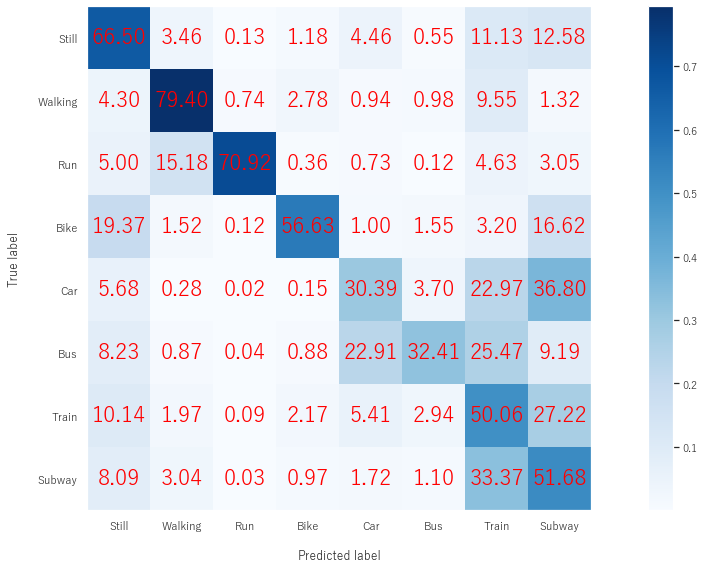

In [16]:
class_names = ["Still", "Walking", "Run", "Bike", "Car", "Bus", "Train", "Subway"]
plot_confusion_matrix(label, predict, class_names, normalize=True, fontsize=22)
plt.grid(False)

In [17]:
predict = np.loadtxt("../Data/TDU_BSA_predictions_notoverwrite.txt")
predict.shape

(57573, 500)

In [18]:
predict = predict.flatten()

In [19]:
print(classification_report(label, predict))

              precision    recall  f1-score   support

         1.0       0.50      0.68      0.58   4847221
         2.0       0.80      0.57      0.66   6116984
         3.0       0.66      0.43      0.52    410120
         4.0       0.51      0.66      0.57   3093102
         5.0       0.25      0.35      0.29   2272189
         6.0       0.75      0.35      0.47   5005036
         7.0       0.39      0.42      0.41   4014213
         8.0       0.27      0.34      0.30   3027635

    accuracy                           0.49  28786500
   macro avg       0.52      0.47      0.48  28786500
weighted avg       0.55      0.49      0.50  28786500



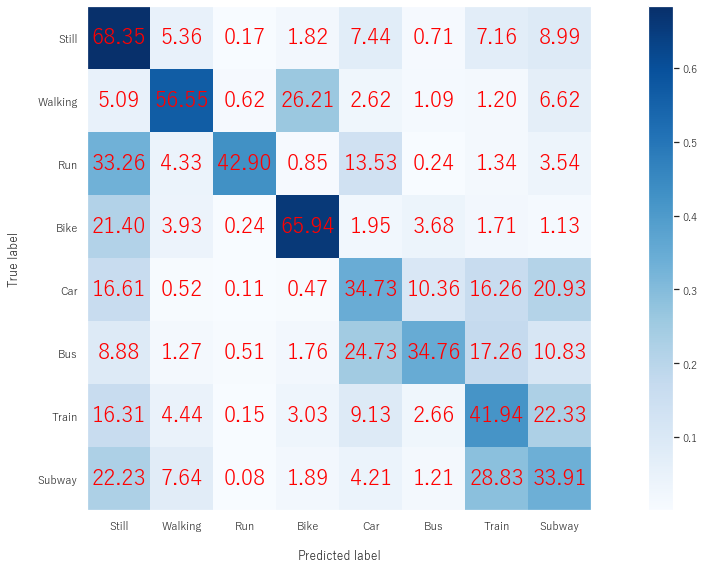

In [20]:
class_names = ["Still", "Walking", "Run", "Bike", "Car", "Bus", "Train", "Subway"]
plot_confusion_matrix(label, predict, class_names, normalize=True, fontsize=22)
plt.grid(False)

# 個々モデル検証

In [6]:
def rename(kind, hold_position, name):
    folder_name = "pattern2NewTest"
    if kind == "test":
        file_path = folder_name + "/" + kind + "_" + name + "分類_pattern2.npy"
        return file_path
    
    if name == "a安部":
        file_path = folder_name + "/" + name + "分類_" + kind + "_" + hold_position + "_pattern2.npy"
#     elif name == "熊野" and kind == "validation":
#         file_path = "pattern" + pattern + "/val_" + hold_position + "_" + name + "分類.npy"
    else:
        file_path = folder_name + "/" + kind + "_" + hold_position + "_" + name + "分類_pattern2.npy"
    return file_path

In [7]:
def logisticTest_pattern2(kind, names):
    file_path = rename(kind, "", names[0])
    x = np.load(file_path)
    print(x.shape)
    for name in names[1:]:
        file_path = rename(kind, "", name)
        x = np.concatenate([x, np.load(file_path)], axis=1)
        print(x.shape)
    return x

In [9]:
names = ["安部", "安部2", "関口", "熊野", "横山", "横山2"]

x_test = logisticTest_pattern2("test", names)
x_test = x_test.reshape([-1, 8 * len(names)])

x_test.shape

(57573, 8)
(57573, 16)
(57573, 24)
(57573, 32)
(57573, 40)
(57573, 48)


(57573, 48)

In [10]:
label = label[:, 250]
label.shape

(57573,)

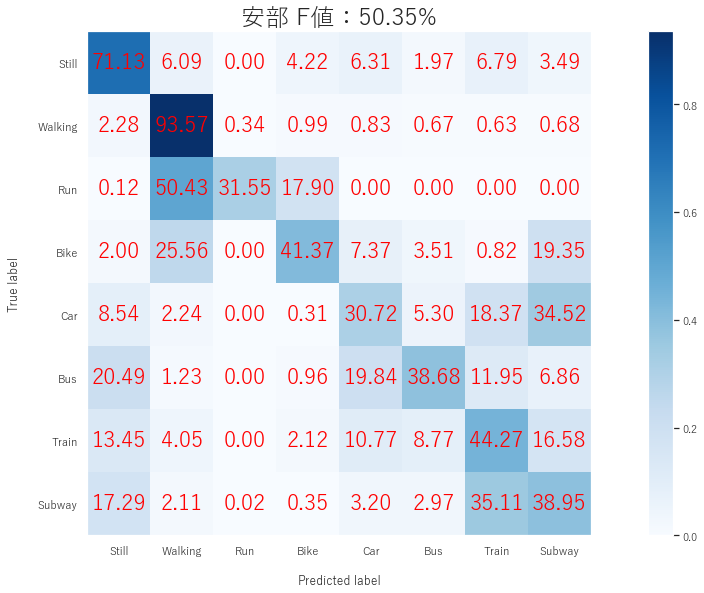

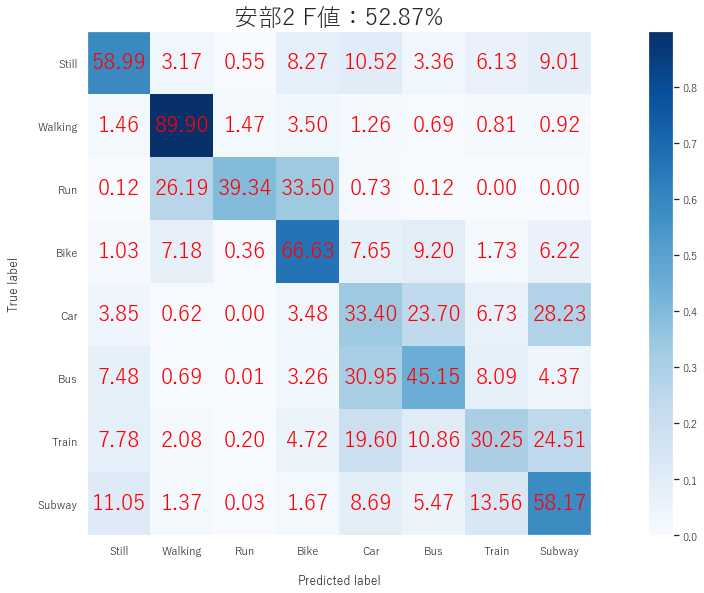

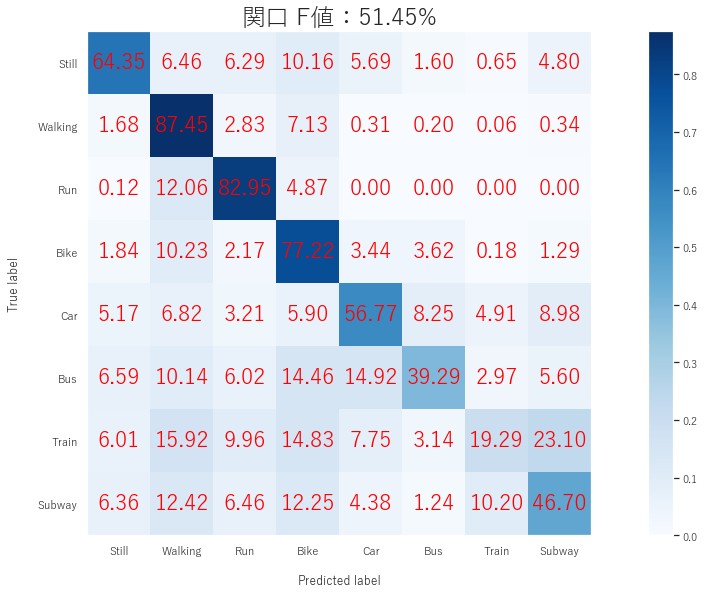

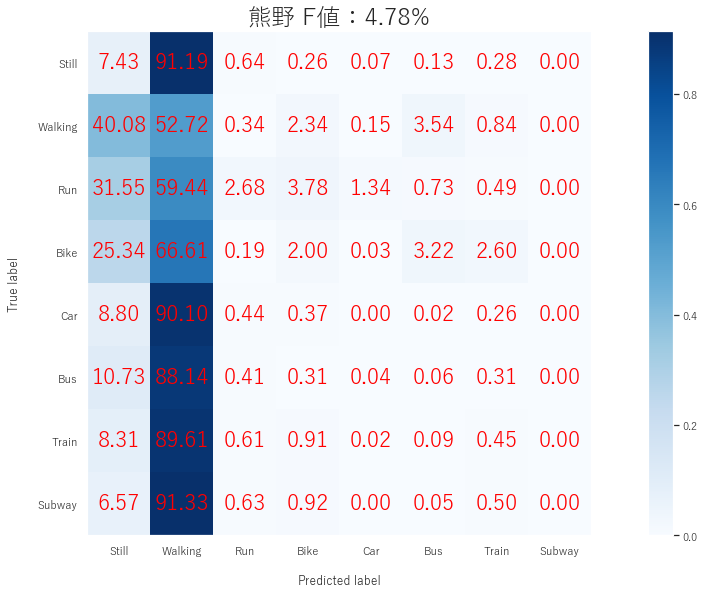

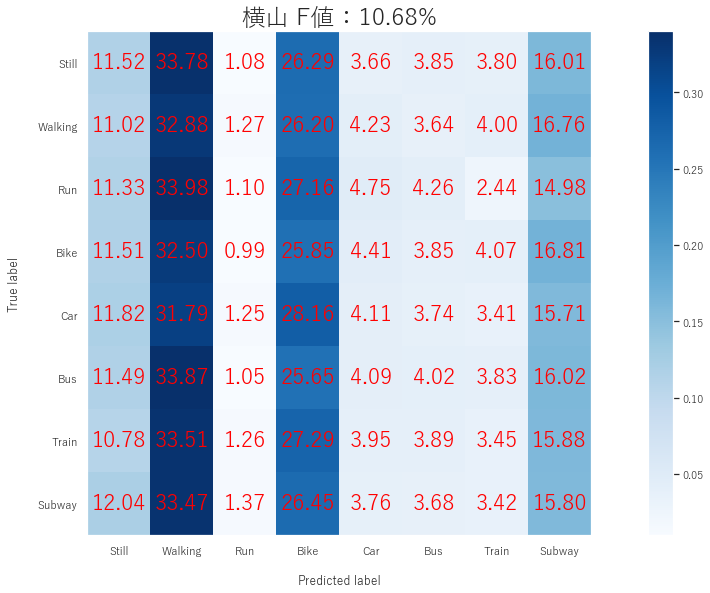

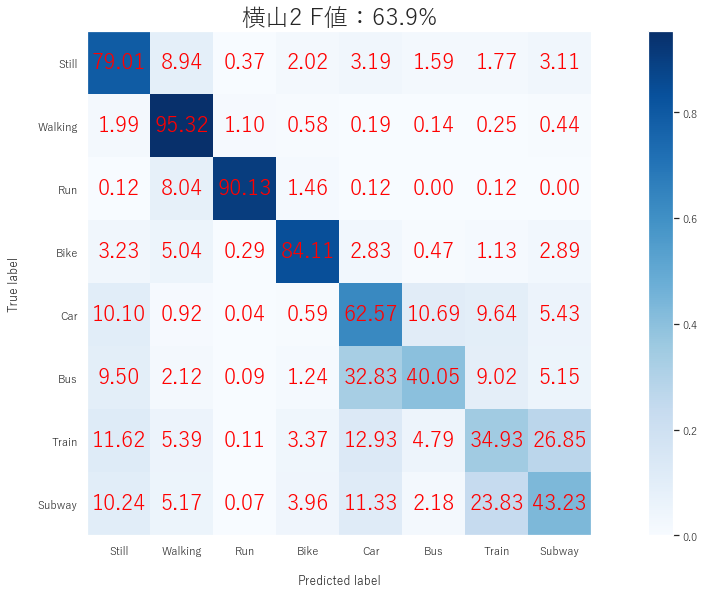

In [17]:
class_names = ["Still", "Walking", "Run", "Bike", "Car", "Bus", "Train", "Subway"]

for i in range(len(names)):
    tmp = np.argmax(x_test[:, i*8:(i+1)*8], axis=1) + 1
    plot_confusion_matrix(label, tmp, class_names, normalize=True, fontsize=22)
    plt.title(names[i] + " F値：" + str(np.round(f1_score(label, tmp, average='macro')*100, 2)) + "%", fontsize=24)
    plt.grid(False)

In [18]:
for i in range(len(names)):
    tmp = np.argmax(x_test[:, i*8:(i+1)*8], axis=1) + 1
    print(names[i])
    print(classification_report(label, tmp))

安部
              precision    recall  f1-score   support

         1.0       0.58      0.71      0.64      9692
         2.0       0.78      0.94      0.85     12232
         3.0       0.86      0.32      0.46       821
         4.0       0.72      0.41      0.53      6185
         5.0       0.25      0.31      0.27      4545
         6.0       0.71      0.39      0.50     10012
         7.0       0.42      0.44      0.43      8030
         8.0       0.31      0.39      0.35      6056

    accuracy                           0.56     57573
   macro avg       0.58      0.49      0.50     57573
weighted avg       0.59      0.56      0.56     57573

安部2
              precision    recall  f1-score   support

         1.0       0.70      0.59      0.64      9692
         2.0       0.89      0.90      0.90     12232
         3.0       0.54      0.39      0.46       821
         4.0       0.63      0.67      0.65      6185
         5.0       0.18      0.33      0.24      4545
         6.0     

C:\Users\Owner\Anaconda3\envs\GPU\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         1.0       0.17      0.12      0.14      9692
         2.0       0.21      0.33      0.26     12232
         3.0       0.01      0.01      0.01       821
         4.0       0.11      0.26      0.15      6185
         5.0       0.08      0.04      0.05      4545
         6.0       0.18      0.04      0.07     10012
         7.0       0.13      0.03      0.05      8030
         8.0       0.10      0.16      0.12      6056

    accuracy                           0.15     57573
   macro avg       0.12      0.12      0.11     57573
weighted avg       0.15      0.15      0.13     57573

横山2
              precision    recall  f1-score   support

         1.0       0.69      0.79      0.74      9692
         2.0       0.84      0.95      0.89     12232
         3.0       0.78      0.90      0.83       821
         4.0       0.85      0.84      0.84      6185
         5.0       0.34      0.63      0.44      4545
         6.0       0

# 関口，横山2アンサンブルで検証

In [23]:
label = np.loadtxt("../../Data/Raw/test/Label.txt")
predict = np.loadtxt("TDU_BSA_predictions_sekiguchiyokoyama2.txt")
label = label.flatten()
predict = predict.flatten()

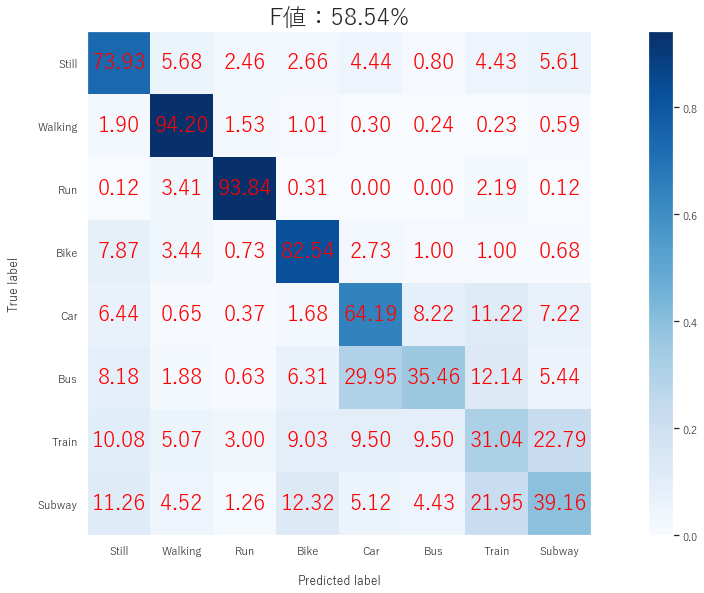

In [24]:
plot_confusion_matrix(label, predict, class_names, normalize=True, fontsize=22)
plt.title("F値：" + str(np.round(f1_score(label, predict, average='macro')*100, 2)) + "%", fontsize=24)
plt.grid(False)

# 安部1，安部2，関口，横山2アンサンブルで検証

In [25]:
predict = np.loadtxt("TDU_BSA_predictions_abe1abe2sekiguchiyokoyama2.txt")
predict = predict.flatten()

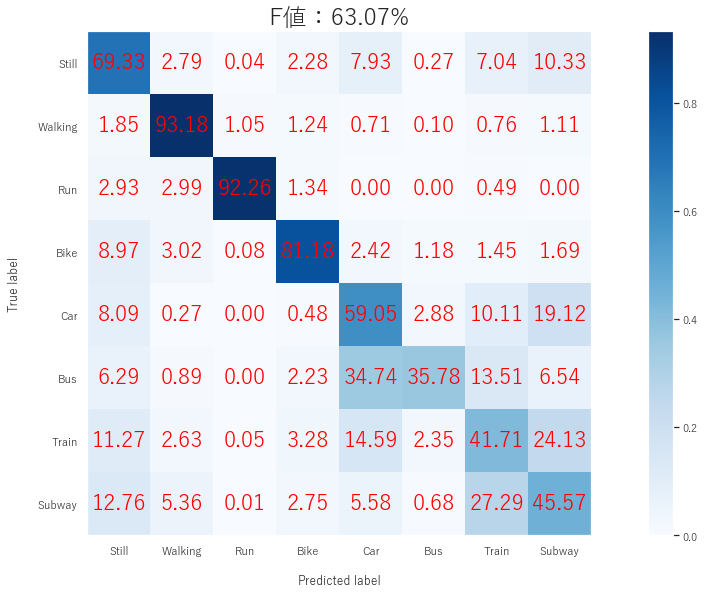

In [26]:
plot_confusion_matrix(label, predict, class_names, normalize=True, fontsize=22)
plt.title("F値：" + str(np.round(f1_score(label, predict, average='macro')*100, 2)) + "%", fontsize=24)
plt.grid(False)

# 6モデルアンサンブル（上書きなし）

In [27]:
predict = np.loadtxt("TDU_BSA_predictions_abe1abe2sekiguchikumanoyokoyama1yokoyama2.txt")
predict = predict.flatten()

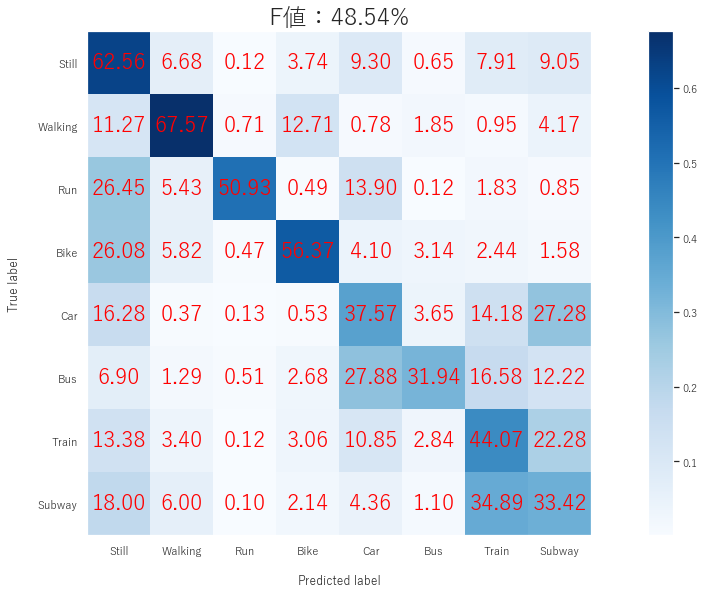

In [28]:
plot_confusion_matrix(label, predict, class_names, normalize=True, fontsize=22)
plt.title("F値：" + str(np.round(f1_score(label, predict, average='macro')*100, 2)) + "%", fontsize=24)
plt.grid(False)